# Tutorial for Reading Structures from Protein Data Bank (PDB) Files and Generating Inputs for NERDSS

## 1. Introduction

Functions from ionerdss enables users to read structures from Protein Data Bank (PDB) file and extract the coordinate information stored inside, and generate NERDSS-readable input files (.mol and .inp files). The functions introduced in this tutorial is a series of step-by-step seperate functions that can be used in Jupyter Notebook. This tutorial treates the chains in the PDB file as individual molecules, and the user can choose to generate input files for all chains or only specific chains.

## 2. Functions

In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion

print('Imports successful!')

Imports successful!


In [4]:
%matplotlib widget

### 2.1 Creating the Main Object

This function will extract the coordinate information stored inside a database PDB file and create a ProteinComplex object. It will calculate the COM of each unique chain, as well as recognize the binding information between each pair of chains (all atoms of different unique chains that are closer than 3.0 angstroms are considered as bound), including whether two chains are bound and the coordinates of each binding interface. All the information will be printed on the screen and the object created can be used to implement other functions.

In [2]:
# reading in a structure from a Protein Data Bank (PDB) file and create a ProteinComplex object
clathrin = ion.ProteinComplex(FileName = "../../data/1utc.pdb")

Finish reading pdb file
4 chain(s) in total: ['A', 'B', 'P', 'Q']
Each of them has [2754, 2763, 66, 66] atoms.
Center of mass of  A is: [0.975, 5.018, 3.545]
Center of mass of  B is: [4.214, 6.886, 2.019]
Center of mass of  P is: [2.635, 5.307, 3.115]
Center of mass of  Q is: [2.555, 6.419, 2.222]
Interaction site of A & B is: [1.752, 6.239, 2.643] and [2.223, 6.546, 2.559] distance between interaction sites is: 0.568 nm
Interaction site of A & P is: [2.096, 5.612, 3.193] and [2.417, 5.159, 3.148] distance between interaction sites is: 0.557 nm
Interaction site of A & Q is: [1.831, 5.940, 1.576] and [2.400, 6.433, 1.890] distance between interaction sites is: 0.815 nm
Interaction site of B & P is: [3.350, 5.290, 2.839] and [2.856, 5.318, 3.063] distance between interaction sites is: 0.544 nm
Interaction site of B & Q is: [3.064, 6.419, 1.962] and [2.619, 6.526, 2.028] distance between interaction sites is: 0.463 nm


### 2.2 Generating 3D Plot 

This function will generate a 3D plot indicaiting the spacial geometry of each simplified chain. The solid lines of different colors are connecting the COM with interfaces within each chain; the black dotted line are connecting each pair of interfaces and the COMs are shown as solid points with their names above. To interact with the plot, other IDEs rather than Jupyter Notebook (such as VSCode) are recommended.

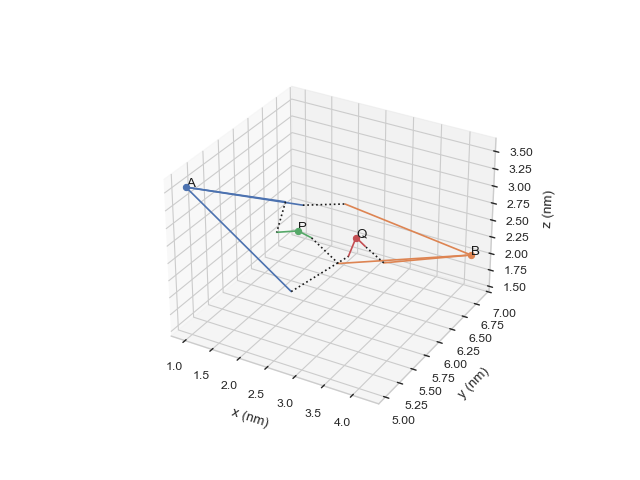

In [5]:
clathrin.plot_3D()

### 2.3 Filtration of Chains

This function will filter the desired chain according to the input list of chain and exclude all the unnecessary coordinate information for future analysis. Here, only chain A, B, and P are being remained so that the number of remaining interaction site will be three.

In [8]:
clathrin_filtered = ion.ProteinComplex(FileName = "../../data/1utc.pdb")
print("\n")
clathrin_filtered.filter(ChainList = ["A", "B", "P"])

Finish reading pdb file
4 chain(s) in total: ['A', 'B', 'P', 'Q']
Each of them has [2754, 2763, 66, 66] atoms.
Center of mass of  A is: [0.975, 5.018, 3.545]
Center of mass of  B is: [4.214, 6.886, 2.019]
Center of mass of  P is: [2.635, 5.307, 3.115]
Center of mass of  Q is: [2.555, 6.419, 2.222]
Interaction site of A & B is: [1.752, 6.239, 2.643] and [2.223, 6.546, 2.559] distance between interaction sites is: 0.568 nm
Interaction site of A & P is: [2.096, 5.612, 3.193] and [2.417, 5.159, 3.148] distance between interaction sites is: 0.557 nm
Interaction site of A & Q is: [1.831, 5.940, 1.576] and [2.400, 6.433, 1.890] distance between interaction sites is: 0.815 nm
Interaction site of B & P is: [3.350, 5.290, 2.839] and [2.856, 5.318, 3.063] distance between interaction sites is: 0.544 nm
Interaction site of B & Q is: [3.064, 6.419, 1.962] and [2.619, 6.526, 2.028] distance between interaction sites is: 0.463 nm


After filter with ['A', 'B', 'P'] :
3 chain(s) in total: ['A', 'B', '

### 2.4 Obtaining COM and reactive interfaces coordinates in .pdb format

This function will generate an output file in .pdb format that only contains the calculated COMs and reaction interfaces for visualization and comparison with the original PDB file. The input will be the returns of the previous function.

Note: The unit for the coordinates in files in .pdb format is in Angstrom but not nm, so the value will be 10 times larger than that in NERDSS input files.

In [9]:
clathrin.write_PDB()

PDB writing complete! (named as show_structure.pdb)


### 2.5 Changing Sigma 

This function allows users to change the value of sigma (the distance between two binding interfaces). The new sigma value and the corresponding coordinates of interfaces will be shown on the screen.

Input the serial number of the pair of interfaces that you want to change the sigma value and the corresponding new sigma values.

The serial number is determined by the sequence shown in the initialization function, for instance, 1 indicates the interface pair A & B, and 3 indicates the interface pair A & Q

Note: If .filter() is run before this function, the serial number will be determined by the updated sequence printed by the filter function.

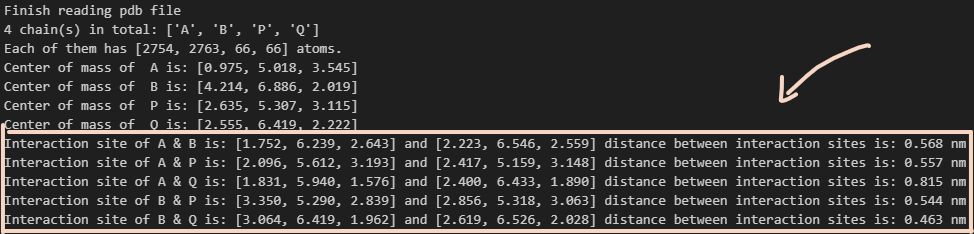

In [10]:
# Change the sigma between A & Q to 1.01 nm and the sigma between B & Q to 0.80 nm
clathrin.change_sigma(ChangeSigma = True, SiteList = [3,5], NewSigma =[1.01,0.80])

New interaction site of A & B is: [1.752, 6.239, 2.643] and [2.223, 6.546, 2.559] distance between new interaction sites is: 0.568 nm
New interaction site of A & P is: [2.096, 5.612, 3.193] and [2.417, 5.159, 3.148] distance between new interaction sites is: 0.557 nm
New interaction site of A & Q is: [1.763, 5.882, 1.539] and [2.468, 6.492, 1.927] distance between new interaction sites is: 1.010 nm
New interaction site of B & P is: [3.350, 5.290, 2.839] and [2.856, 5.318, 3.063] distance between new interaction sites is: 0.544 nm
New interaction site of B & Q is: [3.227, 6.380, 1.937] and [2.457, 6.566, 2.052] distance between new interaction sites is: 0.800 nm


Model visualization after changing sigma.

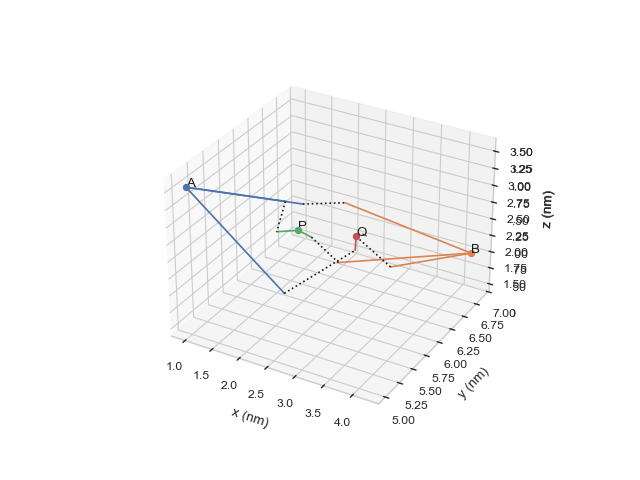

In [11]:
clathrin.plot_3D()

### 2.5 Calculate Associate Angle

This function will calculate the 5 associating angles of each pair of interfaces. The default normal vector will be assigned as (0, 0, 1). If this default normal vector happens to be co-linear with the vector connect the COM with an interface, the system will use (0, 1, 0) instead to resolve co-linear issue. The calculated 5 angles will be shown on the screen automatically. If user intends to manually input the normal vector, please refer to function ‘PDB_UI’, the separated function does not support manual inputs.

Note: The change_sigma() function cannot be run after this function is run. If user intends to change the sigma value, please run the change_sigma() function first.

In [12]:
clathrin.calc_angle()

Angles for chain A & B
Theta1: 2.573, Theta2: 2.726, Phi1: -2.280, Phi2: 1.342, Omega: 1.175
Angles for chain A & P
Theta1: 1.717, Theta2: 1.604, Phi1: -1.527, Phi2: -1.649, Omega: -2.999
Angles for chain A & Q
Theta1: 1.701, Theta2: 1.993, Phi1: -3.033, Phi2: 1.563, Omega: 0.341
Angles for chain B & P
Theta1: 2.121, Theta2: 2.924, Phi1: -1.827, Phi2: -0.467, Omega: 1.817
Angles for chain B & Q
Theta1: 2.400, Theta2: 1.132, Phi1: -1.868, Phi2: -0.836, Omega: -1.870


True

### 2.6 Normalizing COM

This function will normalize the COM of each chain as (0, 0, 0). The interface of each chain will be subtracted by the COM coordinates accordingly. Once the calculation is completed, there will be message shown on the screen.

In [13]:
clathrin.norm_COM()

COM is normalized as [0.000, 0.000, 0.000]


### 2.7 Writing Files

This function will write ‘.inp’ and ‘.mol’ files according to all the calculations and modifications above. Multiple ‘.mol’ file and a ‘.inp’ file can be found in the same directory as the Jupyter Notebook file once the function finish running.

In [14]:
clathrin.write_input()

Input files written complete.


## 3. Run NERDSS Simulation

Clone NERDSS repository from Github (https://github.com/mjohn218/NERDSS). Refer to the user guide and install NERDSS on local device. After installation NERDSS, a executable file named 'nerdss.exe' will be found.

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below in system command line to start simulation:

> ./nerdss -f parm.inp